In [118]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [119]:
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

# y = 0.8x^2 + 0.9x + 2

In [120]:
X

array([[-1.64331202],
       [-0.10192361],
       [-2.25937451],
       [-2.01728163],
       [-2.31483281],
       [-2.95270145],
       [-2.35351584],
       [-1.00341893],
       [-2.55774716],
       [ 1.81974942],
       [ 2.12249036],
       [-0.82391935],
       [-2.14309305],
       [ 2.13175247],
       [ 0.14200385],
       [ 2.63622777],
       [-0.96199622],
       [ 0.31139715],
       [ 0.04612524],
       [ 1.7986915 ],
       [-1.36768675],
       [ 1.73846259],
       [-2.56610533],
       [ 2.54168459],
       [ 1.9426333 ],
       [-2.50718352],
       [ 2.3246628 ],
       [ 1.01449333],
       [ 1.76101985],
       [-1.97446534],
       [ 0.75188713],
       [ 2.47248228],
       [-1.64290707],
       [ 2.46351358],
       [-0.82152282],
       [-0.79338985],
       [-1.3643112 ],
       [-0.05198838],
       [ 2.39804321],
       [ 2.85883207],
       [-0.62599654],
       [ 1.96821283],
       [-0.64545169],
       [-2.73917296],
       [ 0.29180332],
       [-1

In [121]:
y

array([[ 2.21452155],
       [ 2.457841  ],
       [ 4.54453901],
       [ 4.83215264],
       [ 2.92381324],
       [ 6.49736026],
       [ 4.0777309 ],
       [ 0.41261119],
       [ 4.74420368],
       [ 4.59566604],
       [ 8.01698154],
       [ 1.01018355],
       [ 2.4948943 ],
       [ 6.98392283],
       [ 1.99921457],
       [ 7.70232722],
       [ 0.81684114],
       [ 2.4353733 ],
       [ 3.91918189],
       [ 5.70641379],
       [ 0.36586784],
       [ 6.58182381],
       [ 4.03000103],
       [10.99356831],
       [ 6.52863068],
       [ 5.94551465],
       [ 8.36394765],
       [ 4.8984818 ],
       [ 5.02487654],
       [ 3.61505298],
       [ 1.92190403],
       [ 8.66641071],
       [ 1.10727234],
       [ 7.17023136],
       [ 1.41743829],
       [ 1.15120653],
       [ 3.59714913],
       [ 2.29791607],
       [ 8.94306104],
       [11.01403698],
       [ 0.54305873],
       [ 7.66997152],
       [ 0.72494395],
       [ 6.29209974],
       [ 1.05021369],
       [ 1

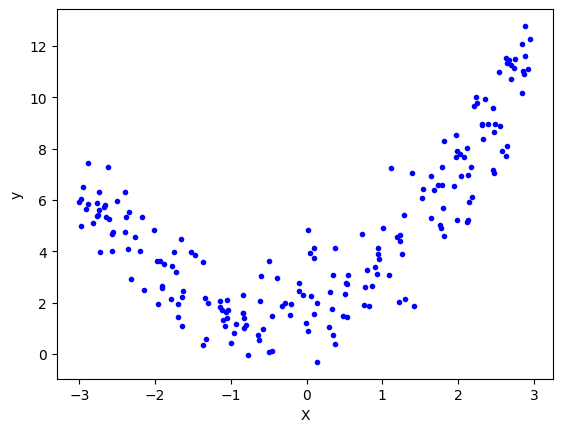

In [122]:
plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [123]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [124]:
lr = LinearRegression()

In [125]:
lr.fit(X_train,y_train)

LinearRegression()

In [126]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.12405941724003577

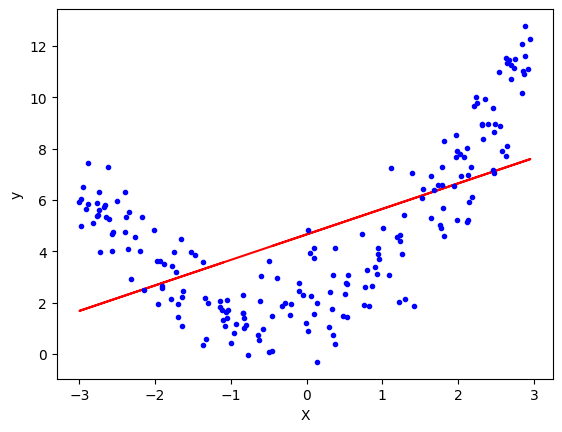

In [127]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [128]:
# Applying Polynomial Linear Regression
# degree 2
poly = PolynomialFeatures(degree=3,include_bias=True)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [129]:
print(X_train[0])
print(X_train_trans[0])

[-0.45035669]
[ 1.         -0.45035669  0.20282115 -0.09134186]


In [130]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [131]:
y_pred = lr.predict(X_test_trans)

In [132]:
r2_score(y_test,y_pred)

0.8461539650934683

In [133]:
accuracy = lr.score(X_test_trans, y_test)
print(f"Accuracy of Polynomial Regression: {accuracy:.2f}")

Accuracy of Polynomial Regression: 0.85


In [134]:
print(lr.coef_)
print(lr.intercept_)

[[ 0.          0.99681018  0.80467633 -0.01195993]]
[1.9443579]


In [135]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

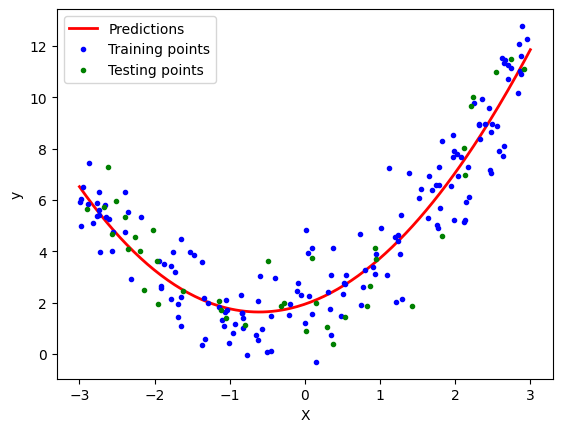

In [136]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [137]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

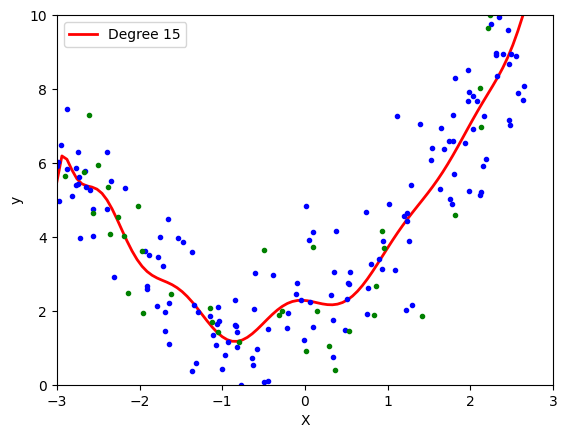

In [138]:
polynomial_regression(15)